#Introduction to Data Science - 22KDL Lab 02: Regression:
**Name:** Phan Văn Hoàng <br>
**ID:** 22280033 <br>
**Class:** 22KDL1


##**Problem Statement**:


###Introduction:
The objective of this report is to construct a linear regression model aimed at predicting the house price per unit area, leveraging a dataset containing various features pertinent to real estate properties in Sindian District, New Taipei City, Taiwan.

## **Data description:**


The dataset is stored in an Excel file format and can be read using the `read_excel(file_path)` function in Python's `pandas` library. The dataset is named `df_estate` and consists of 414 rows and 7 columns (without `No` column), with each row representing a unique property listing.

1. `X1 transaction date`: The date of the property transaction.
2. `X2 house age`: The age of the house in years.
3. `X3 distance to the nearest MRT station`: The distance to the nearest Mass Rapid Transit (MRT) station in meters.
4. `X4 number of convenience stores`: The number of convenience stores in the vicinity.
5. `X5 latitude`: The latitude coordinates of the property location.
6. `X6 longitude`: The longitude coordinates of the property location.
7. `Y house price of unit area`: The price of the house per unit area (in the local currency).

In [252]:
import pandas as pd
import numpy as np

df_estate = pd.read_excel('Real estate valuation data set.xlsx') # Load dataset

df_estate


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


To gain a deeper understanding of the dataset, we utilized the `info()`,`head(10)`,and `shape` functions in Python's `pandas` library. These functions provide valuable insights into the dataset's structure, the initial rows of data and the dimensions of the dataset.

In [253]:
#Getting information of dataset
df_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [254]:
#Getting the first 10 rows of the dataset
df_estate.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [255]:
#Print the dimensions of the dataset
df_estate.shape

(414, 8)

Additionally, we removed the `"No"` column using the `drop()` function from the `pandas` library. This column was not relevant to our analysis and was therefore excluded from the dataset.

In [256]:
# Remove the 'No' column from the DataFrame
df_estate = df_estate.drop(columns=['No'])
df_estate

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


## **Data Exploration:**


### Summary statistics

The summary statistics provided below, using `describe()` function, offer valuable insights into the distribution and central tendencies of the numerical variables in the dataset. These statistics include count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum values.

In [257]:
# Getting summary statistics
df_estate.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Check for missing and duplicated values

To ensure the integrity and reliability of the dataset, we will identify any missing values present in the dataset using `isnull()`.Then we will use `duplicated()` function to identify rows that are exact copies of one another.

In [258]:
# Check missing values in dataset
df_estate.isnull().sum()

# -> There are no missing values in dataset

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [259]:
# Check duplicated rows in dataset
df_estate.duplicated().sum()

# -> There are no duplicated rows in dataset

0

### Distribution of the target variable

In our exploratory data analysis, we delve deeper into the distribution of the target variable, which is the house price per unit area. To visualize the distribution, we utilized the `seaborn` library from Python's extensive toolkit. Next, we will further examine the distribution by creating a histogram using the `displot()` function to gain a closer look.

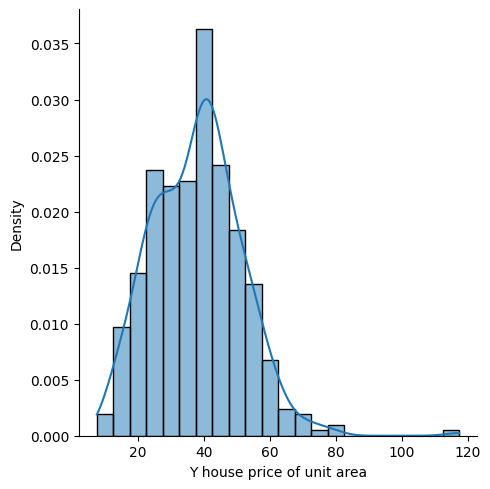

In [260]:
import seaborn as sns


#Plotting Histogram and kernel destiny estimate
sns.displot(df_estate['Y house price of unit area'], kde = True, stat = 'density')


**Conclusion**: The data of `house price` is right-skewed distribution.

###Relationship of target variable with other variables

To further explore the relationship between the house price and other variables in the dataset, we will create scatter plots. Specifically, we will focus on the features `Distance to the nearest MRT station` and `Number of convenience stores` to create scatter plots using `pairplot()` function from `seaborn` and `matplotlib` library.

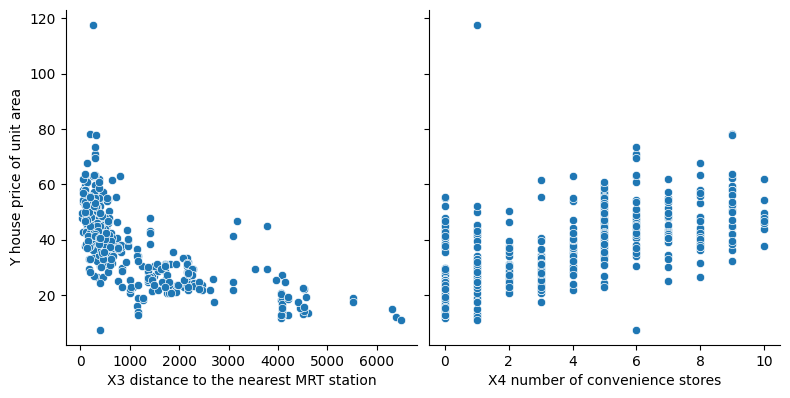

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
sns.pairplot(df_estate, x_vars= ['X3 distance to the nearest MRT station','X4 number of convenience stores'],
             y_vars = 'Y house price of unit area', height = 4, aspect = 1, kind = 'scatter')

plt.show()

##**Data Preprocessing:**

###Removing outliers

Due to the significant impact of outliers on our calculations, we have chosen to remove outliers using the interquartile range `(IQR)` method. To implement this, we will utilize the `quantile()` function to determine both the `IQR` and identify `outliers`. This approach is crucial for ensuring the accuracy and reliability of our data analysis and model development processes.

In [262]:
# Calculate Q1
Q1 = df_estate['Y house price of unit area'].quantile(0.25)

# Calculate Q3
Q3 = df_estate['Y house price of unit area'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_estate = df_estate[(df_estate['Y house price of unit area'] >= lower_bound) & (df_estate['Y house price of unit area'] <= upper_bound)]



After removing the outliers, we will revisit the distribution of the target variable to gain a better understanding of its distribution.

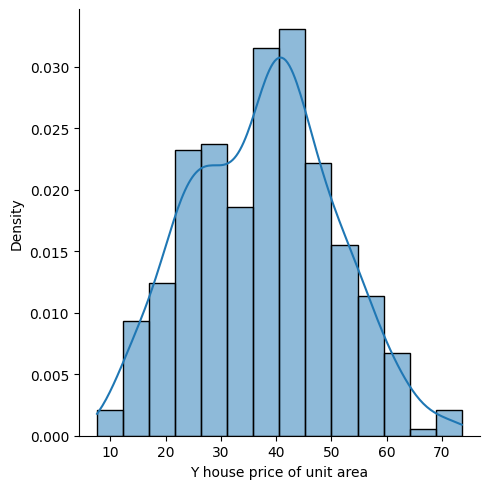

In [263]:
import seaborn as sns

#Plotting Histogram and kernel destiny estimate
sns.displot(df_estate['Y house price of unit area'], kde = True, stat = 'density')

**Conclusion:** Now the data of `house price` is nearly normal distribution.

### Data normalization for numerical features

Normalization is a crucial preprocessing step in preparing data for machine learning models. In this stage, we will employ the `MinMaxScaler` method from the `sklearn.preprocessing` library to fit and transform our data, ensuring that numerical features are normalized to a specified range.

In [264]:
 #Normalize data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

 #Create numeric_cols contains the names of numerical features
numeric_cols = ['X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station','X4 number of convenience stores',	'X5 latitude',	'X6 longitude']

 #Create Min Max scaler object
scaler = MinMaxScaler()

 #Fit and transform data to normalize numerical features
df_estate[numeric_cols] = scaler.fit_transform(df_estate[numeric_cols])

 #Print dataframe with normalized data
df_estate

<ipython-input-264-2d5ae457d165>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estate[numeric_cols] = scaler.fit_transform(df_estate[numeric_cols])


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.272727,0.730594,0.009513,1.0,0.616941,0.719323,37.9
1,0.272727,0.445205,0.043809,0.9,0.584949,0.711451,42.2
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,47.3
3,0.909091,0.303653,0.083315,0.5,0.671231,0.758896,54.8
4,0.181818,0.114155,0.056799,0.5,0.573194,0.743153,43.1
...,...,...,...,...,...,...,...
409,0.363636,0.312785,0.627820,0.0,0.114881,0.326504,15.4
410,0.000000,0.127854,0.010375,0.9,0.512118,0.750162,50.0
411,0.636364,0.429224,0.056861,0.7,0.571498,0.715225,40.6
412,0.363636,0.184932,0.012596,0.5,0.420141,0.723959,52.5


### Encode categorical features

As part of the data preprocessing steps, we extracted a list of column names corresponding to categorical features present in the dataset. This allows us to identify and distinguish categorical variables from numerical ones.


In [265]:
#Get the datatype of dataset
data_types = df_estate.dtypes

# Get the categorical features (select columns with the data types are 'object' or 'category' and convert the features names to the list)
categorical_features = data_types[data_types == 'object'].index.tolist()
categorical_features.extend(data_types[data_types == 'category'].index.tolist())

# Print the list of categorical features
print("Categorical Features:", categorical_features)

Categorical Features: []


 It was determined that the dataset does not contain any categorical features.

### Split the dataset into features and target

In [266]:
#Split the dataset into features (X) and target(Y)
target_col = ['Y house price of unit area']
features_cols = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

X = df_estate[features_cols] # Features X
Y = df_estate[target_col] # Target Y


## **Feature Selection/Engineering: Analyze the correlation and select relevant values**

In this part, we examined the correlation between features and the target variable to identify relevant predictors for our predictive model. <br>


First, we first created a heatmap of the correlation matrix. This visual analysis allows us to assess the strength and direction of correlations between variables using the `heatmap()` function from the `seaborn` library.

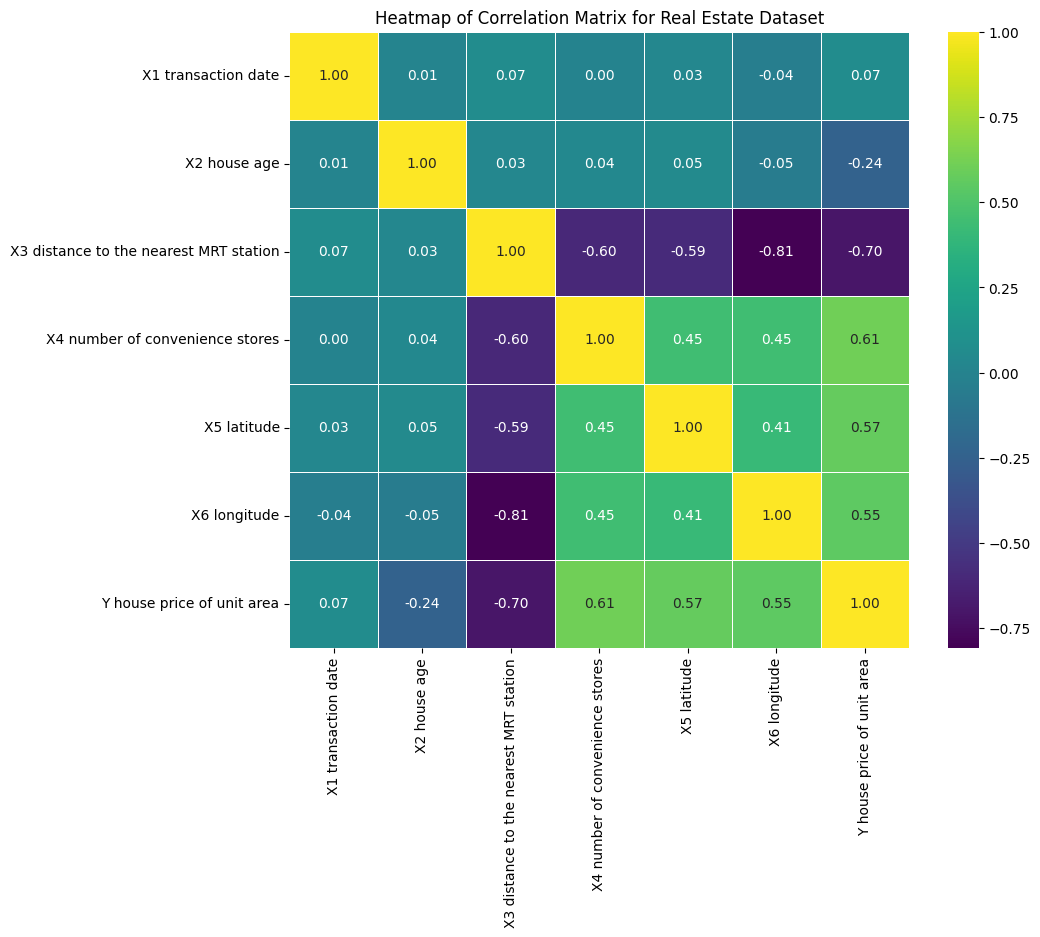

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = df_estate.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap= "viridis", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix for Real Estate Dataset")
plt.show()



In more detail, we computed the correlation coefficients between each feature and the target variable `Y house price of unit area` using `corr()` function.

In [268]:
# Concatenate X and Y into a DataFrame
df_concat = pd.concat([X, Y], axis=1)

# Calculate the correlation between features and the target variable
corr_target = df_concat.corr()['Y house price of unit area'].drop('Y house price of unit area')

# Sort the correlation coefficient
# We use abs() to sort the features based on the strength of the correlation with targeted value
corr_target_sorted = corr_target.abs().sort_values(ascending=False)

# Print the correlation values
corr_target_sorted

X3 distance to the nearest MRT station    0.701349
X4 number of convenience stores           0.605853
X5 latitude                               0.571849
X6 longitude                              0.554585
X2 house age                              0.242852
X1 transaction date                       0.067020
Name: Y house price of unit area, dtype: float64

It was determined that `X3 Distance to the Nearest MRT Station` feature exhibited the highest correlation coefficient of `0.701349` with the target variable `(Y house price of unit area)`. The positive correlation suggests that as the distance to the nearest MRT station increases, the house price per unit area tends to increase. Conversely,  the feature representing the transaction date `(X1)` showed the lowest correlation coefficient of `0.067020` with the target variable. This weak correlation implies that fluctuations in transaction dates may not significantly impact the house price per unit area.

Finally, we selected features that are highly correlated with the target value. In our dataset, we set a `threshold` value of 0.2 to determine high correlation. Features with correlation coefficients greater than or equal to 0.2 with the target variable were considered highly correlated. The list of highly correlated features was then determined and stored for further analysis or modeling.

In [269]:
# Define threshold value
threshold = 0.2

# Select features with highly correlated with targeted value
highly_corr_features = corr_target[corr_target.abs() >= threshold].index.tolist()

# Print highly_correlated_features
highly_corr_features

['X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude']

The following features were determined to be highly correlated based on correlation coefficients exceeding our predefined threshold of 0.2:

* X2 house age
* X3 distance to the nearest MRT station
* X4 number of convenience stores
* X5 latitude
* X6 longitude <br>
These features demonstrate significant relationships with the target variable and are expected to contribute significantly to the predictive performance of our models.

## **Model Training:**

###Split the dataset into training and testing sets

To train and evaluate our predictive models effectively, we split the dataset into two subsets: a training set and a testing set. The training set is used to train the models, while the testing set is used to evaluate their performance on unseen data.<br>
<br>
The dataset was split using an 80:20 ratio, where 80% of the data was allocated to the training set and 20% to the testing set. To accomplish this, we utilized the `train_test_split()` function from the `sklearn.model_selection` library, a widely-used tool for partitioning datasets in machine learning workflows.

In [270]:
from sklearn.model_selection import train_test_split

#Split the dataset into 80:20 ratio using X (highly correlation features) and Y (target)
X_highly = df_estate[highly_corr_features]
X_highly_train, X_highly_test, Y_train, Y_test = train_test_split(X_highly,Y,test_size = 0.2, random_state = 1) # Random state ensures reproducible results

# Print the shapes of X_train, X_test, Y_train, Y_test
print("Training set - X_highly_train:", X_highly_train.shape, "Y_train:", Y_train.shape)
print("Testing set - X_highly_test:", X_highly_test.shape, "Y_test:", Y_test.shape)


Training set - X_highly_train: (328, 5) Y_train: (328, 1)
Testing set - X_highly_test: (83, 5) Y_test: (83, 1)


### Initialize a linear regression model

After splitting the dataset, we have to initialize a linear regression model that we can use for training and making prediction. To do that, we use `LinearRegression()` function from `scikit-learn` library.

In [271]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
linear_reg_model = LinearRegression()


### Train the model

After initializing the linear regression model, we proceeded to train the model using the training data. This was achieved by utilizing the `fit()` function, which instructed the model to learn the relationship between the features represented by `X_highly_train` and the corresponding target variable `Y_train`.

In [272]:
# Train the model
linear_reg_model.fit(X_highly_train, Y_train)

LinearRegression()

After the execution of the fitting process, the linear regression model adjusted its coefficients to capture the relationships between the input features `(X_train)` and the target variable `(Y_train)` in the training dataset.

## **Model Evaluation:**

**Model coefficents**


In [273]:
#Getting the intercept
print('Intercept: ',linear_reg_model.intercept_)

# Get the coefficients of the linear regression model
coefficients = linear_reg_model.coef_

#Print the coefficients paired with feature names
for feature, coefficient in zip(X_highly, coefficients[0]):
    print(f'{feature}: {coefficient}')



Intercept:  [30.30607477]
X2 house age: -11.805828260456977
X3 distance to the nearest MRT station: -22.966358876798765
X4 number of convenience stores: 11.347781183761604
X5 latitude: 20.738311792667012
X6 longitude: 2.760086731008368


The linear regression equation between the features from `X2 house age` to `X6 longitude` and the target `Y house price` with normalized data is: <br>
$$Y = 30.31 - 11.81X_2-22.966X_3+11.35X_4+20.74X_5+2.76X_6$$
where $X_2, X_3,\dots,X_6$ represent the respective features from `X2` to `X6` and $Y$ is the target variable.


**Predicting the Test set result**

As part of the model evaluation process, we utilized the `predict()` function to generate predictions for the target variable in the test set.

In [274]:
#Predicting the Test
Y_pred_test = linear_reg_model.predict(X_highly_test)

#Print 10 values of target prediction
print('Prediction for test set: {}'.format(Y_pred_test[:11]))


Prediction for test set: [[32.70725498]
 [45.67818133]
 [25.48688611]
 [42.85477568]
 [45.38689502]
 [40.98295644]
 [14.66963854]
 [40.86198848]
 [44.49497935]
 [42.98723565]
 [36.82610316]]


**Visualize actual value and the predicted value**

Furthermore, we visualized the actual target values from the test set alongside the predicted target values to examine how these values compare.

To accomplish this, we first created a table of these attributes.

In [275]:
import pandas as pd
import numpy as np

# Convert Y_test and Y_pred to 1-dimensional arrays
Y_test_1d = np.squeeze(Y_test)
Y_pred_test_1d = np.squeeze(Y_pred_test)

# Create a DataFrame with actual and predicted values
reg_model_diff = pd.DataFrame({'Actual value house price': Y_test_1d, 'Predicted value house price': Y_pred_test_1d})

# Display the DataFrame
reg_model_diff

,Actual value house price,Predicted value house price
259,28.8,32.707255
29,57.1,45.678181
187,22.0,25.486886
294,38.1,42.854776
262,53.0,45.386895
...,...,...
106,47.1,47.536988
288,51.0,45.280916
127,55.0,48.028716
11,58.1,51.273674


Then, to achieve this visualization, we utilized the `lmplot()` function from the `seaborn` library. This function creates a scatter plot with a linear regression line, providing insights into the relationship between the actual and predicted target values.

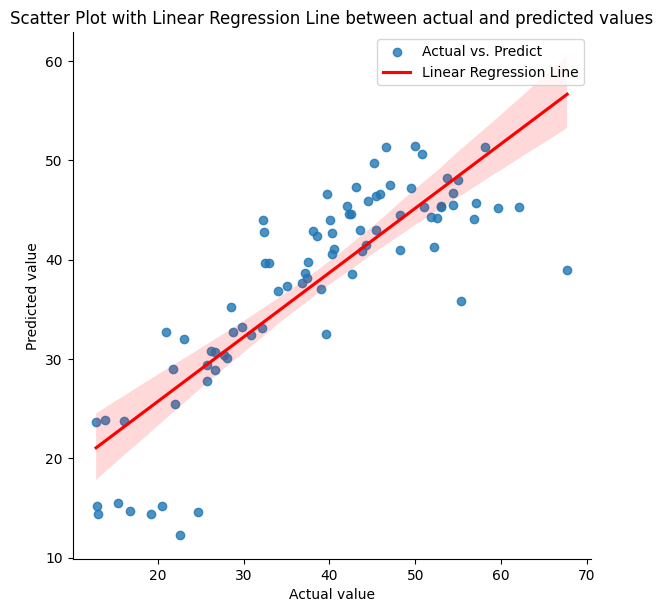

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a linear regression line
sns.lmplot(x='Actual value house price', y='Predicted value house price', data=reg_model_diff, height=6,line_kws={'color': 'red'})
plt.title('Scatter Plot with Linear Regression Line between actual and predicted values')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.legend(['Actual vs. Predict','Linear Regression Line'])
plt.show()

**Evaluation Metrics**

Additionally, to assess the performance of the model, we calculated several evaluation metrics such as MSE, MAE, RMSE and R-squared. These metrics offer insights into the accuracy and performance of the regression model.



In [277]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_pred_test, Y_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred_test)

# Calculate R-squared (R²)
r_squared = r2_score(Y_test, Y_pred_test)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): ",mse)
print(f"Root Mean Squared Error (RMSE): ",rmse)
print(f"Mean Absolute Error (MAE): ",mae)
print(f"R-squared (R²): ",r_squared)


Evaluation Metrics:
Mean Squared Error (MSE):  52.36623463528239
Root Mean Squared Error (RMSE):  7.236451798725836
Mean Absolute Error (MAE):  5.44214719364252
R-squared (R²):  0.6972866025330045


As a result, the relationship between the actual and predicted values accounts for approximately $70\%$ of the variation in the data. This indicates that most of variation in the data explained by the actual/predicted relationship.

**Lasso and Ridge model:**


In addition to the linear regression model, we extended our analysis to include Lasso and Ridge regression models. To evaluate the performance of these models, we employed the `train_test_split` method

In [278]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize models
linear_reg_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

# Combine models and their names
models = {
    'Linear Regression': linear_reg_model,
    'Ridge': ridge_model,
    'Lasso': lasso_model
}

# Define a function to evaluate metrics
def evaluate_metrics(model, X_highly_test, Y_test):
    Y_pred_test = model.predict(X_highly_test)
    r2 = r2_score(Y_test, Y_pred_test)
    mse = mean_squared_error(Y_test, Y_pred_test)
    mae = mean_absolute_error(Y_test, Y_pred_test)
    return r2, mse, mae

# Evaluate metrics for each model
for model_name, model in models.items():
    model.fit(X_highly_train, Y_train)
    r2, mse, mae = evaluate_metrics(model, X_highly_test, Y_test)
    print(f'{model_name}:')
    print(f'R-squared: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print()


Linear Regression:
R-squared: 0.6973
Mean Squared Error: 52.3662
Mean Absolute Error: 5.4421

Ridge:
R-squared: 0.6926
Mean Squared Error: 53.1707
Mean Absolute Error: 5.5304

Lasso:
R-squared: 0.3893
Mean Squared Error: 105.6424
Mean Absolute Error: 8.5437



##**Hyperparameter Tuning**

###K-fold cross validation


 In the previous section, we trained the model using `hold-out cross-validation`, also known as `train_test_split`, where the dataset was divided into an 80:20 ratio for training and testing. In this section, we will employ `k-fold cross-validation`. This technique involves splitting the dataset into k equal-sized subsets, or folds. The model is then trained and evaluated k times, with each iteration using a different fold as the test set and the remaining folds as the training set.

We considered three models for evaluation: Linear Regression, Ridge Regression, and Lasso Regression. Each model was trained and evaluated using `k-fold cross-validation`, and their R-squared values were compared to assess their predictive accuracy.

In [279]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer, r2_score

# Initialize models
linear_reg_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

# Combine models and their names
models = {
    'Linear Regression': linear_reg_model,
    'Ridge': ridge_model,
    'Lasso': lasso_model
}

# Define the number of folds for cross-validation
k = 10

# Perform k-fold cross-validation for each model and calculate R-squared values
for model_name, model in models.items():
    # Define cross-validation strategy
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    # Perform cross-validation and calculate R-squared scores
    cv_scores = cross_val_score(model, X_highly, Y, cv=kf, scoring=make_scorer(r2_score))

    # Calculate mean R-squared score
    mean_r2_score = np.mean(cv_scores)

    print(f'{model_name}: Mean R-squared score: {mean_r2_score:.2f}')
    print(f'{model_name}: R-squared scores for each fold:')
    print(cv_scores)

Linear Regression: Mean R-squared score: 0.61
Linear Regression: R-squared scores for each fold:
[0.44302582 0.39873503 0.64799932 0.5821863  0.74412502 0.54628775
 0.71479124 0.58659196 0.59698776 0.80155982]
Ridge: Mean R-squared score: 0.61
Ridge: R-squared scores for each fold:
[0.46299284 0.40545024 0.64639972 0.58196048 0.74237987 0.54728492
 0.7107188  0.58061391 0.59431006 0.79683909]
Lasso: Mean R-squared score: 0.36
Lasso: R-squared scores for each fold:
[0.31662041 0.29109821 0.37940948 0.32834894 0.44007876 0.33507719
 0.39662663 0.35183683 0.28760654 0.47912207]


### Grid search

We conducted hyperparameter tuning using grid search with k-fold cross-validation technique to optimize the performance of Lasso and Ridge regression models on our dataset. The objective was to minimize the penalty term associated with regularization, which is governed by the hyperparameter α. <br>





For Ridge regression, the penalty term is proportional to the square of the coefficients, calculated as α * sum(coefficients^2), where α is the hyperparameter. Similarly, for Lasso regression, the penalty term is proportional to the absolute value of the coefficients, computed as α * sum(abs(coefficients)), where α is the hyperparameter.
<br> <br>
After thorough tuning, we determined the optimal values of α corresponding to Lasso and Ridge regression.

In [280]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define parameter grids for Lasso and Ridge regression
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize KFold cross-validation object
kf = KFold(n_splits= 10, shuffle=True, random_state=42)

# Initialize Lasso and Ridge regression models
lasso_model = Lasso()
ridge_model = Ridge()

# Initialize GridSearchCV for Lasso regression
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
# Initialize GridSearchCV for Ridge regression
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to data for Lasso regression
lasso_grid_search.fit(X_highly_train, Y_train)
# Fit GridSearchCV to data for Ridge regression
ridge_grid_search.fit(X_highly_train, Y_train)

# Get best parameters and scores for Lasso regression
best_params_lasso = lasso_grid_search.best_params_
best_score_lasso = -lasso_grid_search.best_score_
print("Best parameters for Lasso:", best_params_lasso)
print("Best MSE score for Lasso:", best_score_lasso)

# Calculate R-squared for the best Lasso model on the testing data
lasso_best_model = lasso_grid_search.best_estimator_
lasso_test_preds = lasso_best_model.predict(X_highly_test)
lasso_test_r2 = r2_score(Y_test, lasso_test_preds)
print("R-squared on test set for best Lasso model:", lasso_test_r2)

# Get best parameters and scores for Ridge regression
best_params_ridge = ridge_grid_search.best_params_
best_score_ridge = -ridge_grid_search.best_score_
print("\nBest parameters for Ridge:", best_params_ridge)
print("Best MSE score for Ridge:", best_score_ridge)

# Calculate R-squared for the best Ridge model on the testing data
ridge_best_model = ridge_grid_search.best_estimator_
ridge_test_preds = ridge_best_model.predict(X_highly_test)
ridge_test_r2 = r2_score(Y_test, ridge_test_preds)
print("R-squared on test set for best Ridge model:", ridge_test_r2)


Best parameters for Lasso: {'alpha': 0.01}
Best MSE score for Lasso: 64.02551121117668
R-squared on test set for best Lasso model: 0.6969482870799462

Best parameters for Ridge: {'alpha': 1}
Best MSE score for Ridge: 63.95361800368714
R-squared on test set for best Ridge model: 0.6926364018060408


##**Conclusion**

**Summarize:**


*  Using appropriate metrics such as mean squared error (MSE), mean absolute error (MAE), root mean squared error (RMSE), and R-squared. This allowed us to assess the models' predictive accuracy, interpretability, and generalization to unseen data.
*   Hyperparameter tuning is a useful technique for increasing model accuracy and precision, decreasing training time, and lowering the risk of overfitting.
*   Furthermore, an `R-squared` value of $0.69$ indicates that approximately $69\%$ of the variance in the target variable with hyperparameter tuning is explained by the independent variables when training the model. This statement suggests that models from `Linear`,`Ridge` and `Lasso` regression all provide a reasonably good fit to the data.

  



**Limitation:**


*  The `R-squared` value obtained from the `Lasso` regression model without hyperparameter tuning was approximately $39\%$, which is lower than that of the `Linear` and `Ridge` regression models. `Lasso` regression tends to aggressively shrink coefficients towards zero, potentially discarding important predictors. This behavior can lead to underfitting of the data and a reduction in the model's explanatory power, resulting in a lower R-squared value.
*   One disadvantage of the K-Fold cross-validation method is that increasing the value of k leads to training more models, which can make the training process more expensive and time-consuming.



**Strategies for improving the model:**


*   In addition to employing Lasso, Ridge, and Linear regression, we explored the use of other machine learning algorithms to select the best-performing model for our task. This included Logistic Regression, Support Vector Machine (SVM), XGBoost, Neural Network,...
*  We can further enrich our model by creating new features that capture the changing dynamics of house prices over time.

